In [9]:
import numpy as np
import glob
import os
import sys
import json
import re
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
"""
Read case data
"""
cf_path = os.path.join(sys.path[0],"conf.json")
with open(cf_path) as f:
    config = json.load(f)



In [12]:
"""
calc fronts
"""

cases = ["h4r3_P931_S1219_gl"]
res = {}

for cas in cases:
    data = read_front(cas)
    times_c, r_s_c, vals_c = calc_front(data, 0.0, use_max=True)
    times_f, r_s_f, vals_f = calc_front(data, 0.1, use_max=False)

    res[cas] = {}
    res[cas] = {
        "times_c" : times_c,
        "r_s_c" : r_s_c,
        "vals_c" : vals_c,
        "times_f" : times_f,
        "r_s_f" : r_s_f,
        "vals_f" : vals_f
    }

ValueError: could not convert string to float: 't= 2.0 [s]'

Text(0.5, 1.0, 'h04_r04_grob_long')

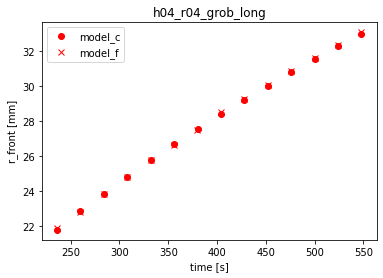

In [ ]:
"""
plot data
"""
# calc = ["front" , "center"]
calc = ["front"]

case = cases[0]

if "center" in calc:
    exp_c = "r_c_PF"
    # exp_c = "r_c_ground"

if "front" in calc:
    exp_f = "r_f_PF"
    # exp_f = "r_f_ground"

if exp_c == "" or exp_f == "":
    print(f"Please choose one of these experiments: {exps}")

if "center" in calc:
    exp_t_c = np.array(dat[exp_c][exp_c + " t [s]"].round(0))
    exp_t_c = exp_t_c.astype(float)
    t_tmp_c = []
    y_tmp_c = []
    t_c = res[case]["times_c"]
    y_c = res[case]["r_s_c"]

    for ele in exp_t_c:
        if ele in t_c:
            t_tmp_c.append(ele)
            y_tmp_c.append(y_c[int(ele)-1] * 1e3)

    plt.plot(t_tmp_c, y_tmp_c, 'bo')
    plt.plot(dat[exp_c][exp_c + " t [s]"], dat[exp_c][exp_c + " r [mm]"], 'bx')
            
if "front" in calc:
    exp_t_f = np.array(dat[exp_f][exp_f + " t [s]"].round(0))
    exp_t_f = exp_t_f.astype(float)

    t_tmp_f = []
    y_tmp_f = []
    t_f = res[case]["times_f"]
    y_f = res[case]["r_s_f"]

    for ele in exp_t_f:
        if ele in t_f:
            t_tmp_f.append(ele)
            y_tmp_f.append(y_f[int(ele)-1] * 1e3)
    plt.plot(t_tmp_f, y_tmp_f, 'ro')
    plt.plot(dat[exp_f][exp_f + " t [s]"], dat[exp_f][exp_f + " r [mm]"], 'rx')

plt.legend(["model_c", "model_f", "exp_c", "exp_f"])
plt.xlabel("time [s]")
# plt.xlim(200,560)
# plt.ylim(10,35)
plt.ylabel("r_front [mm]")
plt.title(case)

Text(0.5, 0, 'time [s]')

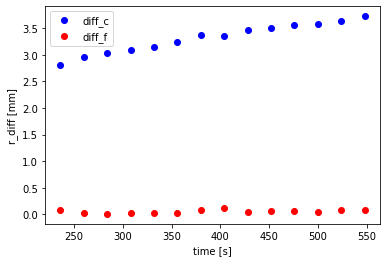

In [ ]:
test_f = abs(len(dat[exp_c][exp_c + " r [mm]"])-len(y_tmp_c))
test_c = abs(len(dat[exp_f][exp_f + " r [mm]"])- len(y_tmp_f))

if test_c != 0:
    exp_c_tmp = np.array(list(dat[exp_c][exp_c + " r [mm]"]))[:-test_c]
else:
    exp_c_tmp = np.array(list(dat[exp_c][exp_c + " r [mm]"]))
if test_f != 0:
    exp_f_tmp = np.array(list(dat[exp_f][exp_f + " r [mm]"]))[:-test_f]
else:
    exp_f_tmp = np.array(list(dat[exp_f][exp_f + " r [mm]"]))

y_tmp_c = np.array(y_tmp_c)
y_tmp_f = np.array(y_tmp_f)

diff_c = abs(exp_c_tmp - y_tmp_c)
diff_f = abs(exp_f_tmp - y_tmp_f)

plt.plot(t_tmp_c, diff_c, 'bo')
plt.plot(t_tmp_f, diff_f, 'ro')
plt.legend(["diff_c", "diff_f"])
plt.ylabel("r_diff [mm]")
plt.xlabel("time [s]")

Text(0.5, 0, 'time [s]')

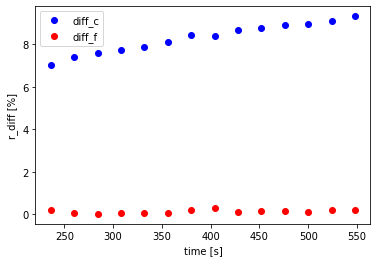

In [ ]:
radius = int(case.split("_")[1].split("r")[1])*10

diff_c_pct = (diff_c / radius) * 100
diff_f_pct = (diff_f / radius) * 100

plt.plot(t_tmp_c, diff_c_pct, 'bo')
plt.plot(t_tmp_f, diff_f_pct, 'ro')
plt.legend(["diff_c", "diff_f"])
plt.ylabel("r_diff [%]")
plt.xlabel("time [s]")
